### Rudraksh Singh E22CSEU0010, Harsh Yaduwanshi E22CSEU0021, Keerthi Thorat E22CSEU1442

## Weather Predictor

# 2.**IMPORTING THE REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

# 3.**ANALYSING THE DATASET**

There are **6 Variables** in this Dataset:
* **4 Continuous** Variables.
* **1 Variable** to accommodate the Date.
* **1 Variable** refers the Weather.

In [2]:
df=pd.read_csv("seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
df.shape

(1461, 6)

As of it has **6 Columns** with total of **1461 Rows** as our observations in the Data set. 

# 4.**DATA EXPLORATION**

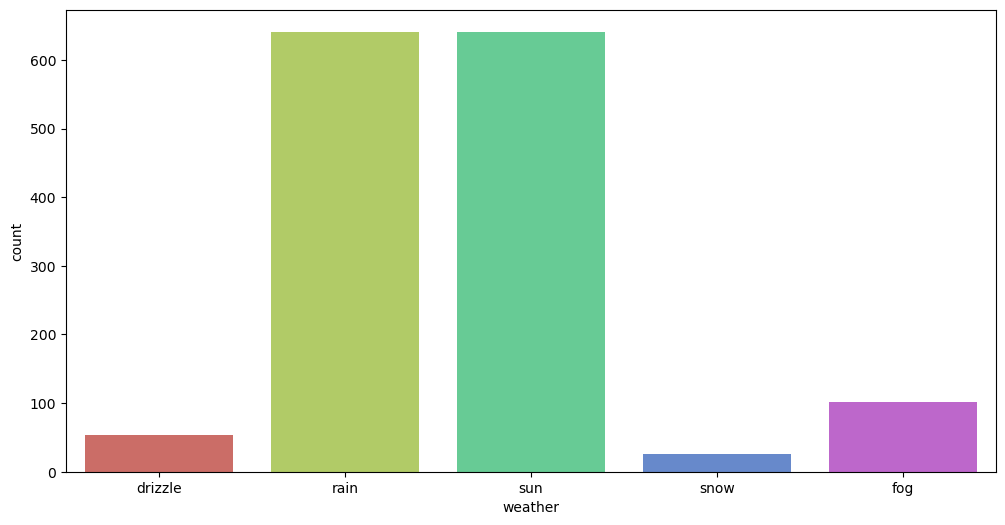

In [4]:
plt.figure(figsize=(12, 6))
sns.countplot(x='weather', data=df, palette='hls')
plt.show()

In [5]:
countrain=len(df[df.weather=="rain"])
countsun=len(df[df.weather=="sun"])
countdrizzle=len(df[df.weather=="drizzle"])
countsnow=len(df[df.weather=="snow"])
countfog=len(df[df.weather=="fog"])
print("Percent of Rain:{:2f}%".format((countrain/(len(df.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(df.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(df.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(df.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(df.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


From the Above countplot the data set contains higher amount of data with the weather datail of ***Rain and Sun*** and it also have some additionals like ***drizzle,snow and fog*** .

# 5.**NUMERICAL OR CONTINUOUS VARIABLES**

  Next we will explore the ***Continuous variables***

In [6]:
df[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


Distribution of numerical value using ***Histogram and Violin plot .***

<Axes: xlabel='wind', ylabel='Count'>

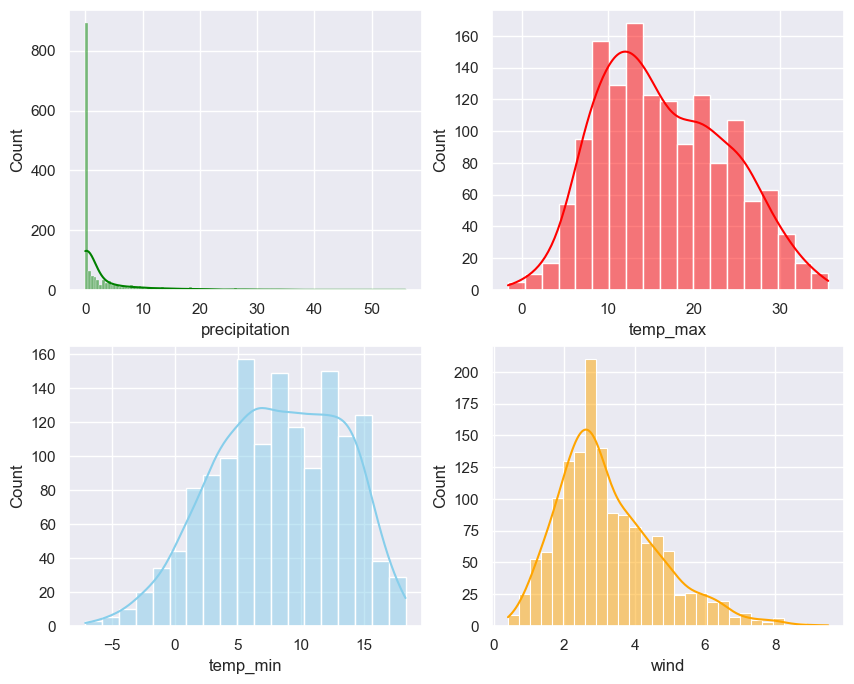

In [7]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

From the above distribution it is clear that **precipitation and wind** are **Positively skewed.**

And **temp_min** is **Negatively skewed** and both has some***outliers.***

# 6.**HOW TO FIND THE OUTILERS OR SKEW IN DATA SET?**



* ***We can find the outliers in the dataset by using following plots:***

  1.**Hist plot**
  
  2.**Box plot**
  
  3.**Violin plot**
  
  4.**Dist plot**
yet both ***box and violin plots*** are easier to handel with.

# 6.1.***VIOLIN PLOT***

<Axes: xlabel='wind'>

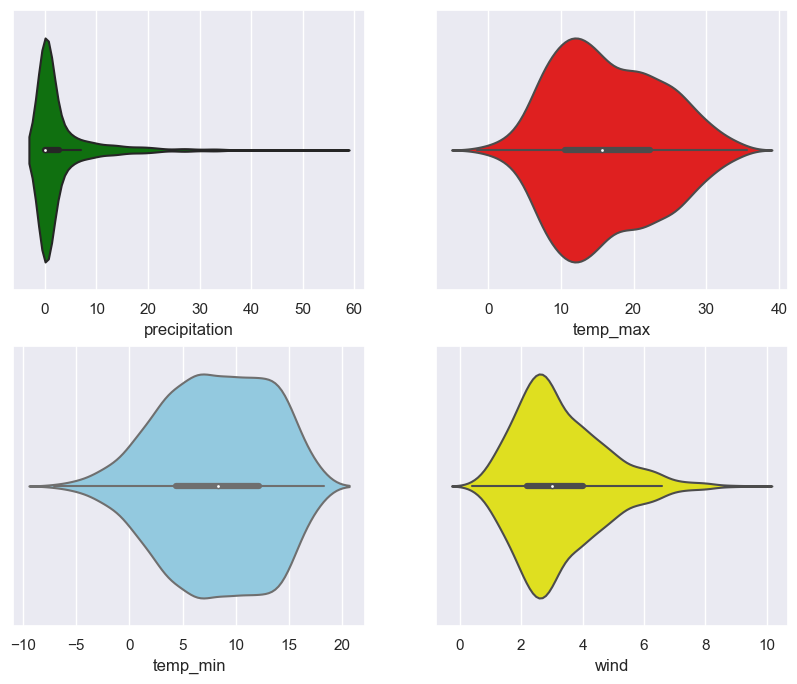

In [8]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=df,x="wind",kde=True,ax=axs[1,1],color='yellow')

From the above ***Violin plot*** we can clearly understand the Skewness of the Data as the **TAIL** indicates the skewness.

# 6.2.*BELOW DIAGRAM SHOWS THE EXACT OF HOW THE* **SKEWNESS LOOKS:**

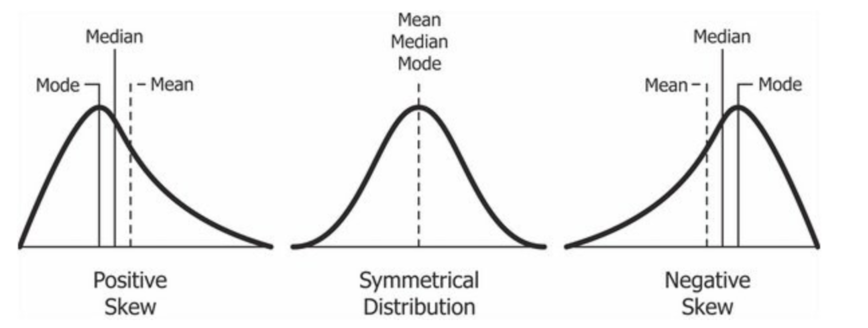

# 6.3.***SKEWNESS USING BOXPLOT***

**OTHER EXPLORATION**

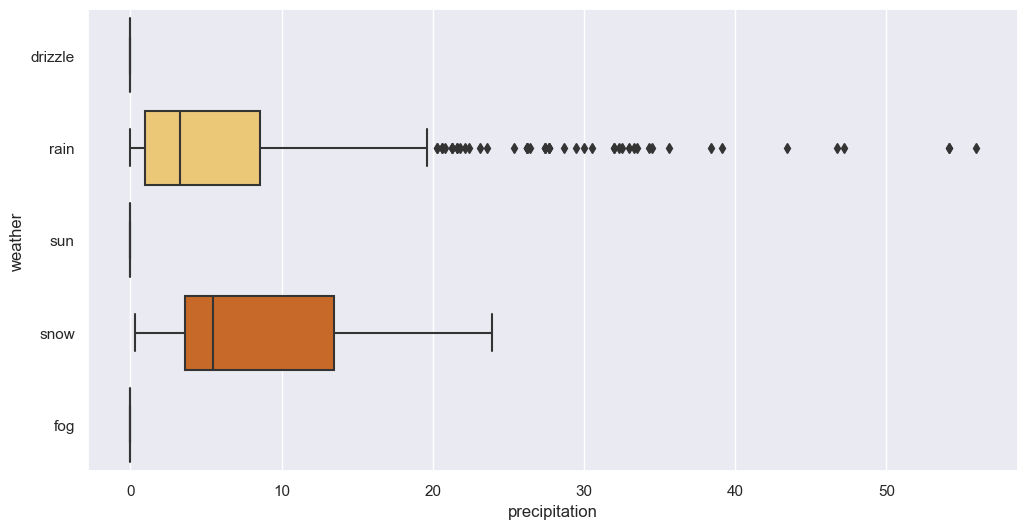

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="precipitation", y="weather", data=df, palette="YlOrBr")
plt.show()

From the above box plot between the ***Weather and Precipitation*** 
the value ***Rain*** has many **positive outliers** and both **Rain and Snow** were ***positively skewed/has positive skewness***.

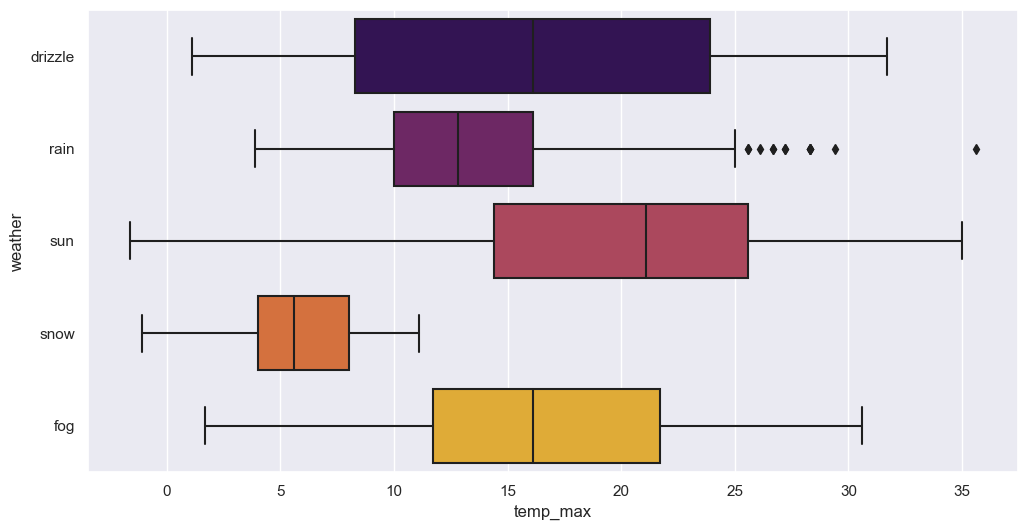

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x="temp_max",y="weather",data=df,palette="inferno")
plt.show()

<Axes: xlabel='wind', ylabel='weather'>

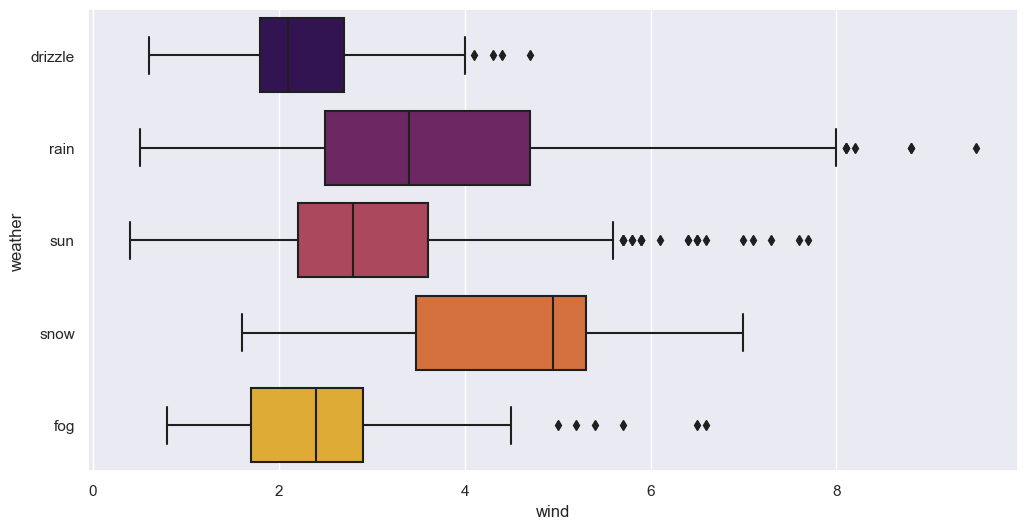

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x="wind",y="weather",data=df,palette="inferno")

From the above box plots ,we came to know that Every ***attribute of weather*** has some ***positive outliers** and it is ***both types of skewness***.

<Axes: xlabel='temp_min', ylabel='weather'>

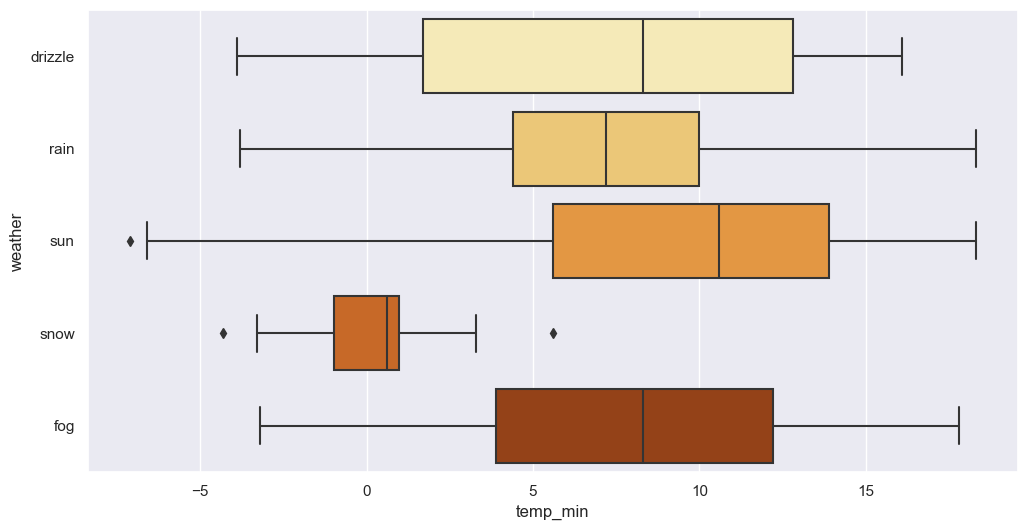

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x="temp_min",y=
            "weather",data=df,palette="YlOrBr")

here some data has ***negative*** and some have both ***positive and negative*** outliers and ***snow is negatively skewed.
***SKEWNESS AND ITS CORRECTIONS:***

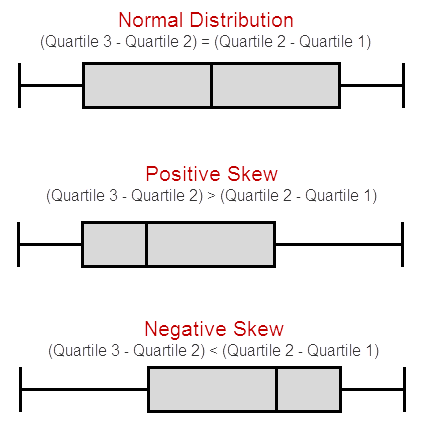

**HEATMAP:**

<Axes: >

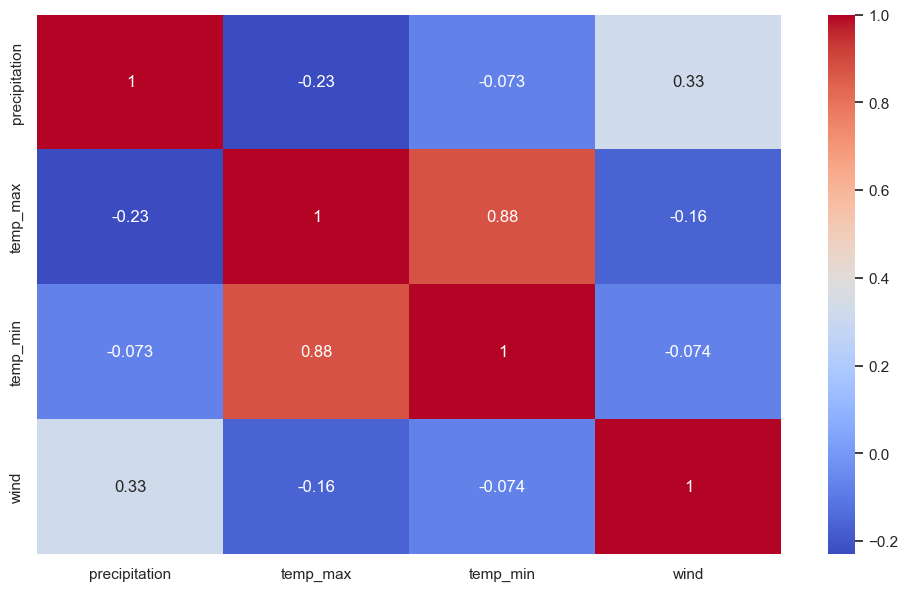

In [13]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

There is a ***positive correlation*** between ***temp_max and temp_min***.

**Numerical - Numerical**

Pearson correlation: -0.22855481643297046
T Test and P value: Ttest_indResult(statistic=-51.60685279531918, pvalue=0.0)


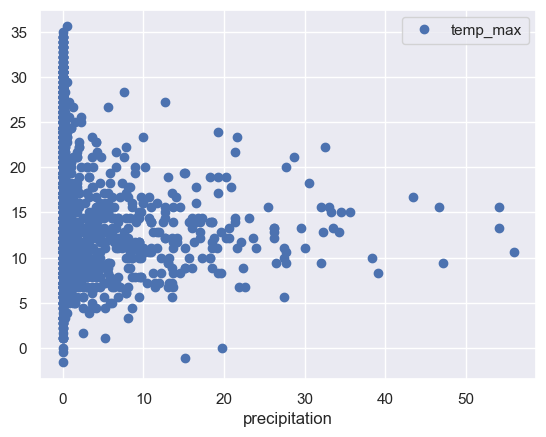

In [14]:
df.plot("precipitation","temp_max",style='o') 
print("Pearson correlation:",df["precipitation"].corr(df["temp_max"]))
print("T Test and P value:",stats.ttest_ind(df["precipitation"],df["temp_max"]))

Pearson correlation: -0.16485663487495478
T Test and P value: Ttest_indResult(statistic=-67.3601643301846, pvalue=0.0)


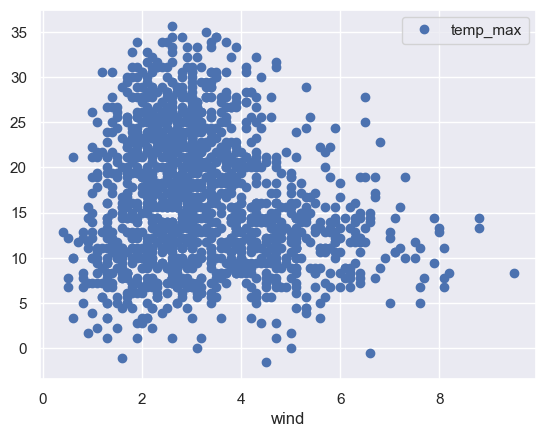

In [15]:
df.plot("wind","temp_max",style='o') 
print("Pearson correlation:",df["wind"].corr(df["temp_max"]))
print("T Test and P value:",stats.ttest_ind(df["wind"],df["temp_max"]))

As from the above result of ***T test and P value of 0*** indicates that the ***Null hypothesis*** in the corresponding columns is **rejected** and the columns are ***Statistically significant*** 

<Axes: xlabel='temp_max'>

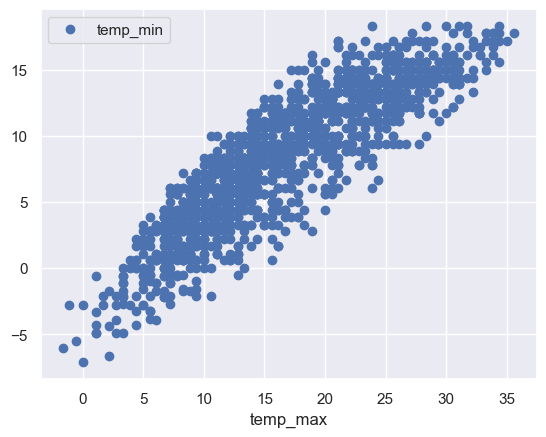

In [16]:
df.plot("temp_max","temp_min",style='o') 

# 7.NULL VALUES:

In [17]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

**Checking for Null values in the data set**

The below plot shows that all the columns in the data set ***doesn't contains Null values*** as each columns contains a ***total of 1461*** observations.

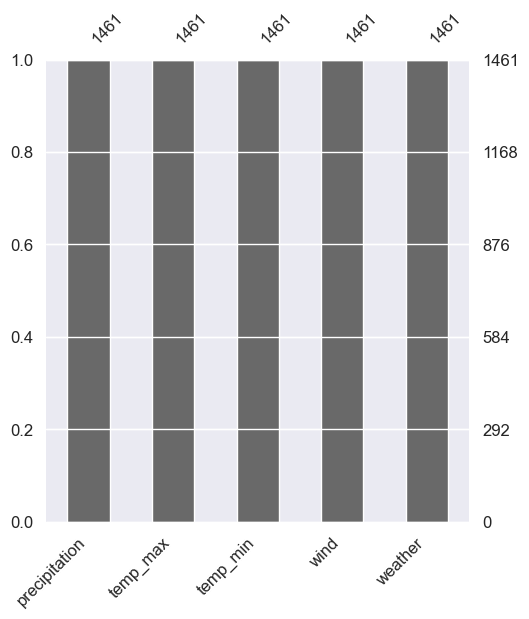

In [18]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(df.drop(["date"],axis=1),ax=axz,fontsize=12);

# 8.DATA PREPROCESSING:

**Drop Unnecessary Variables**

In this data set Date is a unnecessary variable as it does not affect the data so it can be dropped.

In [19]:
df=df.drop(["date"],axis=1)

**Remove Outliers & Infinite Values**

Since this dataset contains ***Outliers ,it will be removed***,to make data set more even.

In [20]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

***Skewed Distribution Treatment***

In [21]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

<Axes: xlabel='wind', ylabel='Count'>

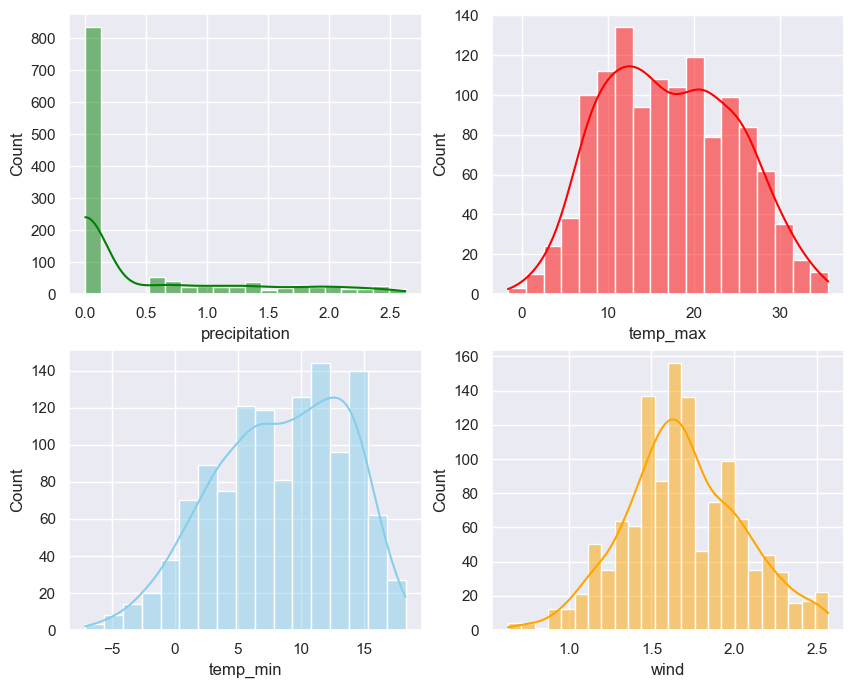

In [22]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

In [23]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
2,0.894427,11.7,7.2,1.516575,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain


***Scaling the weather variables using label Encoder:***

In [24]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

In [25]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2


***SPLITTING THE DATASET INTO DEPENDANT AND INDEPENDANT VARIABLES:***

In [26]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values

In [27]:
df.weather.unique()

array([0, 2, 4, 3, 1])

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

# 9.ALGORITHMS AND MODEL TRAINING:

**K-NEAREST NEIGHBOR CLASSIFIER:**

In [1]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define hyperparameter grids for each algorithm
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

svm_param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf']
}

gbc_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgbc_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize models
knn_model = KNeighborsClassifier()
svm_model = SVC()
gbc_model = GradientBoostingClassifier()
xgbc_model = xgb.XGBClassifier()

# Create GridSearchCV objects for each model
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy')
svm_grid = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy')
gbc_grid = GridSearchCV(gbc_model, gbc_param_grid, cv=5, scoring='accuracy')
xgbc_grid = GridSearchCV(xgbc_model, xgbc_param_grid, cv=5, scoring='accuracy')

# Fit the models with hyperparameter tuning on the training data
knn_grid.fit(x_train, y_train)
svm_grid.fit(x_train, y_train)
gbc_grid.fit(x_train, y_train)
xgbc_grid.fit(x_train, y_train)

# Get the best hyperparameters and models
best_knn_model = knn_grid.best_estimator_
best_svm_model = svm_grid.best_estimator_
best_gbc_model = gbc_grid.best_estimator_
best_xgbc_model = xgbc_grid.best_estimator_

# Evaluate the models
models = [
    ("KNN", best_knn_model),
    ("SVM", best_svm_model),
    ("GBC", best_gbc_model),
    ("XGBC", best_xgbc_model)
]

for model_name, model in models:
    # Make predictions on the test set
    predictions = model.predict(x_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"Confusion Matrix for {model_name}:")
    print(cm)

    # F1 Score
    f1 = f1_score(y_test, predictions, average='weighted')
    print(f"F1 Score for {model_name}: {f1}")

    # Precision and Recall
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    print(f"Precision for {model_name}: {precision}")
    print(f"Recall for {model_name}: {recall}")


NameError: name 'x_train' is not defined

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Define hyperparameter grids for each algorithm
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

svm_param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf']
}

gbc_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgbc_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Split the data into training and testing sets
# Replace 'data' with your dataset
x_train, x_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

# Initialize models
knn_model = KNeighborsClassifier()
svm_model = SVC()
gbc_model = GradientBoostingClassifier()
xgbc_model = xgb.XGBClassifier()

# Create GridSearchCV objects for each model
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy')
svm_grid = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy')
gbc_grid = GridSearchCV(gbc_model, gbc_param_grid, cv=5, scoring='accuracy')
xgbc_grid = GridSearchCV(xgbc_model, xgbc_param_grid, cv=5, scoring='accuracy')

# Fit the models with hyperparameter tuning on the training data
knn_grid.fit(x_train, y_train)
svm_grid.fit(x_train, y_train)
gbc_grid.fit(x_train, y_train)
xgbc_grid.fit(x_train, y_train)

# Get the best hyperparameters and models
best_knn_model = knn_grid.best_estimator_
best_svm_model = svm_grid.best_estimator_
best_gbc_model = gbc_grid.best_estimator_
best_xgbc_model = xgbc_grid.best_estimator_

# Evaluate the models
models = [
    ("KNN", best_knn_model),
    ("SVM", best_svm_model),
    ("GBC", best_gbc_model),
    ("XGBC", best_xgbc_model)
]

for model_name, model in models:
    # Make predictions on the test set
    predictions = model.predict(x_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"Confusion Matrix for {model_name}:")
    print(cm)

    # F1 Score
    f1 = f1_score(y_test, predictions, average='weighted')
    print(f"F1 Score for {model_name}: {f1}")

    # Precision and Recall
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    print(f"Precision for {model_name}: {precision}")
    print(f"Recall for {model_name}: {recall}")


# 10.CHECKING FOR THE USER INPUT:

In [ ]:
    if model_name == "XGBC":
        # Calculate predicted probabilities for XGBoost
        probabilities = model.predict_proba(x_test)

        # Calculate ROC-AUC for each class separately
        roc_auc_scores = []
        for class_idx in range(len(model.classes_)):
            class_y_test = (y_test == class_idx).astype(int)
            roc_auc = roc_auc_score(class_y_test, probabilities[:, class_idx])
            roc_auc_scores.append(roc_auc)
            print(f"ROC-AUC for class {class_idx} in {model_name}: {roc_auc:.2f}")

        # Average ROC-AUC scores for all classes
        average_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
        print(f"Average ROC-AUC for {model_name}: {average_roc_auc:.2f}")

        # Plot ROC curve for a specific class (e.g., class 0)
        class_0_y_test = (y_test == 0).astype(int)
        fpr, tpr, thresholds = roc_curve(class_0_y_test, probabilities[:, 0])
        
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {average_roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name} (Class 0)')
        plt.legend(loc="lower right")
        plt.show()


In [30]:
# User input
precipitation = 50
max_temp = 55.0
min_temp = 32.2
wind = 12.3

# Create a feature vector from user input
input_data = np.array([precipitation, max_temp, min_temp, wind]).reshape(1, -1)

# Use the XGBoost model to predict the weather
predicted_class = best_xgbc_model.predict(input_data)

# Define weather conditions
weather_conditions = ["Drizzle", "Fog", "Rain", "Snow", "Sun"]

# Print the weather condition
print("The weather is:", weather_conditions[predicted_class[0]])

NameError: name 'best_xgbc_model' is not defined